In [1]:
#Fuwei Huang
#The below code are to use historgram match to calulate a score for each of the pokemon classes
#The score can be calulated by pass in the image dict variable

In [2]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2
import os
import copy

%matplotlib inline

In [3]:
image_path = 'C:\\Users\\Huang\\Desktop\\CV_HistogramDataset'
class_list = ['bulbasaur','charmander','pikachu','squirtle']
OPENCV_methodName=['Correlation','Chi-Squared','Intersection','Hellinger']

In [4]:
OPENCV_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL),
        ("Chi-Squared", cv2.HISTCMP_CHISQR),
        ("Intersection", cv2.HISTCMP_INTERSECT),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

In [5]:
#Read in the image function
def read_image_files(image_path,conversion=cv2.COLOR_BGR2RGB):
#The glob() function returns an array of filenames or directories matching a specified pattern.
    image_files = glob.glob(os.path.join(image_path,'*'))
    image_list = [(os.path.basename(f),cv2.cvtColor(cv2.imread(f),conversion)) for f in image_files]
    image_dict = {file:image for (file,image) in image_list} #dictionary
    return image_dict
#Generate histogram function
def generate_histogram(image_dict):
    histogram_dict = {}
    for filename in image_dict:
        image = image_dict[filename]
        hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [10, 250, 10, 250, 10, 250])
        hist = cv2.normalize(hist, hist).flatten()
        histogram_dict[filename] = hist
    return histogram_dict
def RGB_graph(image_dict):
    color = ('r','g','b')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image_dict],[i],None,[256],[1, 256])
        histr = cv2.normalize(histr, histr).flatten()
        plt.plot(histr,color = col)
#Score function to calucate the pokemon score
def scorerange_calculation(results):
    scores = [scores for (scores,filename) in results]
    avge_score = sum(scores)/len(scores)
    median_score = scores[int(len(scores)/2)]
    max_score = max(scores)
    min_score = min(scores)
    return scores,avge_score,median_score,max_score,min_score
#Target pikachu histogram function

#Find the base score of target pokemon
def find_base_score(target_his_dict):
    target_list=[]
    target_score=dict()
    for position,(methodName, method) in enumerate(OPENCV_METHODS):
        target_list.append(cv2.compareHist(target_his_dict, target_his_dict,method))
        
    target_score={OPENCV_methodName[key]: target_list[key] for key in range(len(OPENCV_methodName)) }
    return target_score

def Compare_historgram(target_his_dict,image_dict,histogram_dict,label):
    #Generate histogram from the image of the folder
    for position,(methodName, method) in enumerate(OPENCV_METHODS):
        # initialize the results dictionary and the sort
        results = {}
        reverse = False

        # Reverse the order of correlation or intersection result
        if methodName in ("Correlation", "Intersection"):
                reverse = True

        # loop over the index
        for (k, hist) in histogram_dict.items():
            # Compare two histograms and update the resultc
            d = cv2.compareHist(target_his_dict, hist, method)
            results[k] = d
            
        #Find the base score of pokemon
        c= cv2.compareHist(target_his_dict, target_his_dict, method)
        
        # sort the results
        results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
        
        #Calculate the min,max of a score
        print(methodName)
        scores_pikachu,avge_score_pikachu,median_score_pikachu,max_score_pikachu,min_score_pikachu=scorerange_calculation(results)
        print('average_score:',avge_score_pikachu)
        print('median_score:',median_score_pikachu)
        print('min_score:',min_score_pikachu)
        print('max_score:',max_score_pikachu)
        print()
        #print(avge_score,median_score,max_score,min_score)
        
    # show the target image
        plt.imshow(image_target_dict[label])
        plt.axis("off")
        
        fig = plt.figure("Results:%s %.2f" % (methodName,c))
        fig.suptitle("%s - Pikachu base score:%.2f" % (methodName,c))
        plt.axis("off")
        
        for(i,(v,k)) in enumerate(results):
            ax = fig.add_subplot(7,2,i+1)
            ttl=ax.set_title("%s:%.2f" %(k,v))
            plt.imshow(image_dict[k])
            ttl.set_position([.5, 0.895])
            plt.axis("off")


In [6]:
image_class_dict = dict()
hist_class_dict = dict()

# Read and Process the pokemon target images
image_target_dict = read_image_files(os.path.join(image_path,'targets'))
hist_target_dict = generate_histogram(image_target_dict)

# Read and Process the pokemon images from different class
for c in class_list:
    image_class_dict[c] = read_image_files(os.path.join(image_path,'classes',c))
    hist_class_dict [c] = generate_histogram(image_class_dict[c])

# Read and Process the mystery images

image_mystery_dict = read_image_files(os.path.join(image_path,'mystery'))
hist_mystery_dict = generate_histogram(image_mystery_dict)

In [7]:
#Find the base score of target pokemon
find_base_score(hist_target_dict['target_bulbasaur.png'])

{'Correlation': 1.0,
 'Chi-Squared': 0.0,
 'Intersection': 20.449462683944148,
 'Hellinger': 0.0}

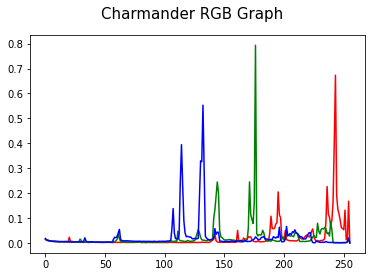

In [8]:
plt.suptitle('Charmander RGB Graph', fontsize = 15)
RGB_graph(image_target_dict['target_charmander.png'])

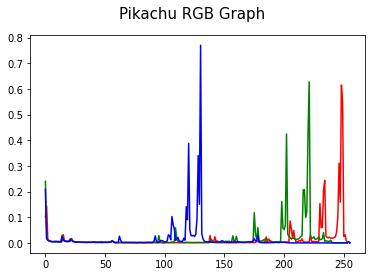

In [9]:
plt.suptitle('Pikachu RGB Graph', fontsize = 15)       
RGB_graph(image_target_dict['target_pikachu.png'])

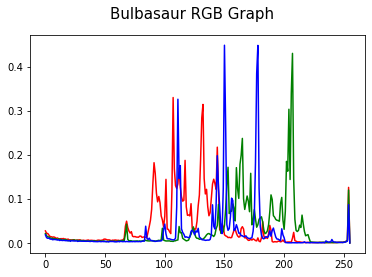

In [10]:
plt.suptitle('Bulbasaur RGB Graph', fontsize = 15)       
RGB_graph(image_target_dict['target_bulbasaur.png'])

Correlation
average_score: 5.300153883492328e-05
median_score: 2.6185050661110252e-06
min_score: -2.0941590316759585e-06
max_score: 0.00039967922193958493

Chi-Squared
average_score: 19.30809937624228
median_score: 6.082167825849782
min_score: 5.998410770320943
max_score: 93.49909422114159

Intersection
average_score: 0.01633797726422017
median_score: 0.0028236217567609856
min_score: 7.222545536933467e-05
max_score: 0.09040607604401885

Hellinger
average_score: 0.9967309104146622
median_score: 0.9989827540550774
min_score: 0.9788872294398036
max_score: 0.9998789352680609



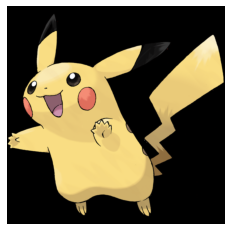

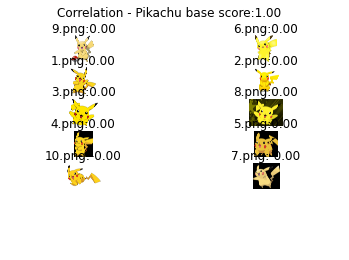

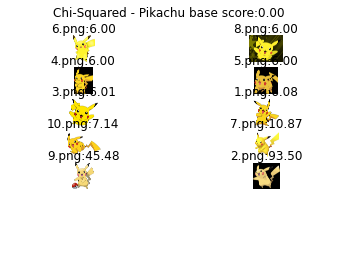

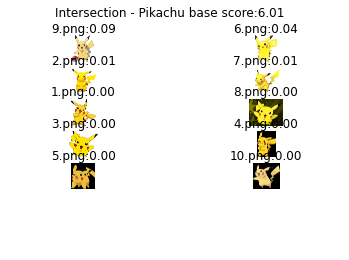

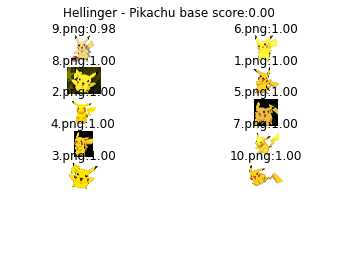

In [11]:
Compare_historgram(hist_target_dict['target_pikachu.png'],image_class_dict['pikachu'],hist_class_dict['pikachu'],'target_pikachu.png')

Correlation
average_score: 0.0016903379467367856
median_score: 6.911189465040393e-05
min_score: -2.560749106437713e-06
max_score: 0.010634895720514551

Chi-Squared
average_score: 370.45765573769893
median_score: 21.61464504166301
min_score: 20.449182698594598
max_score: 2250.712508437268

Intersection
average_score: 0.20651995481994162
median_score: 0.05662349834346969
min_score: 0.0
max_score: 0.6800054404739058

Hellinger
average_score: 0.9876460810901498
median_score: 0.9900508077021402
min_score: 0.9743403538364275
max_score: 1.0



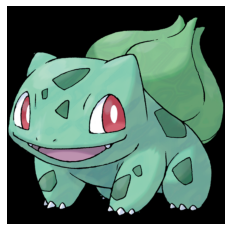

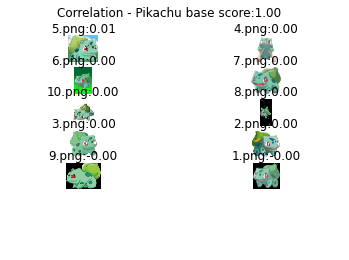

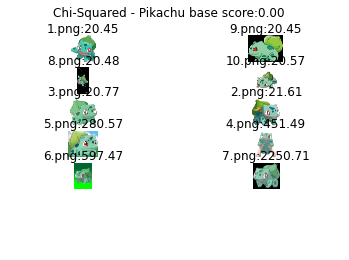

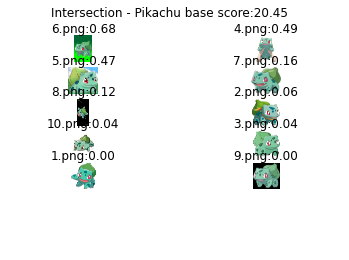

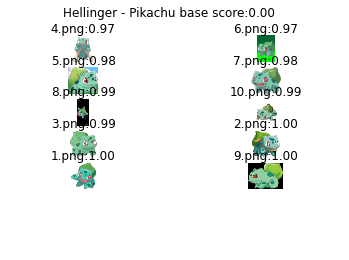

In [12]:
Compare_historgram(hist_target_dict['target_bulbasaur.png'],image_class_dict['bulbasaur'],hist_class_dict['bulbasaur'],'target_bulbasaur.png')

Correlation
average_score: 1.0295205436184313e-05
median_score: 9.619053808397456e-07
min_score: -8.841152698779738e-07
max_score: 3.5536197494994784e-05

Chi-Squared
average_score: 18.117292844448066
median_score: 9.92859769782112
min_score: 9.894243795046101
max_score: 52.838247861507966

Intersection
average_score: 0.013184045364414487
median_score: 0.004572760058181302
min_score: 0.00053778501751367
max_score: 0.04124635631160345

Hellinger
average_score: 0.9978602105035315
median_score: 0.9984913376207664
min_score: 0.9956057210255689
max_score: 0.9998658264105194



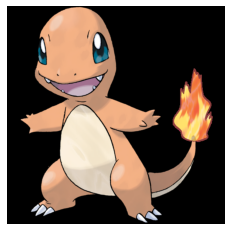

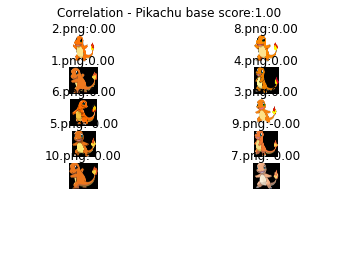

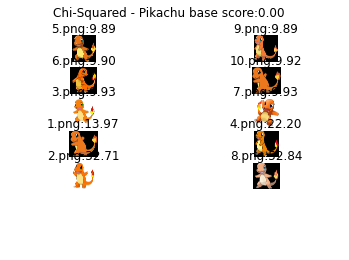

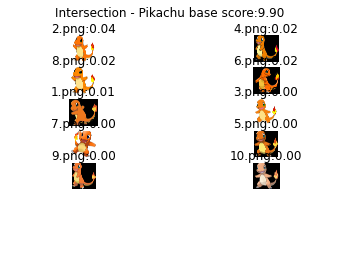

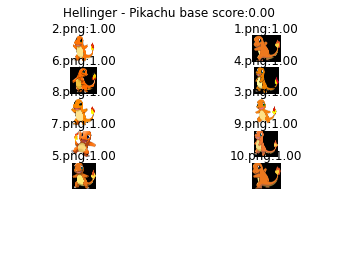

In [13]:
Compare_historgram(hist_target_dict['target_charmander.png'],image_class_dict['charmander'],hist_class_dict['charmander'],'target_charmander.png')

Correlation
average_score: 8.747271850574453e-05
median_score: 8.556949924651446e-07
min_score: -4.885803146254794e-06
max_score: 0.00048315733177423765

Chi-Squared
average_score: 180.70823145862695
median_score: 15.830506308718395
min_score: 15.534678805048536
max_score: 905.3893363846715

Intersection
average_score: 0.04909279783170177
median_score: 0.0073869211846613325
min_score: 0.0001906289663793359
max_score: 0.2270684663017164

Hellinger
average_score: 0.9955114806028199
median_score: 0.9984157506652063
min_score: 0.9801705655969853
max_score: 0.999881604062522



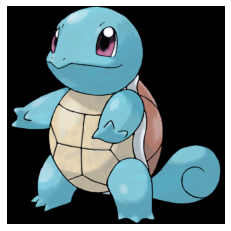

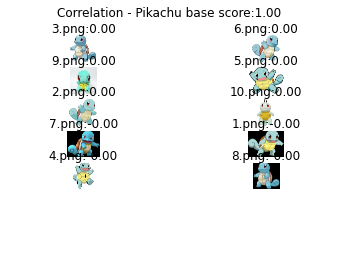

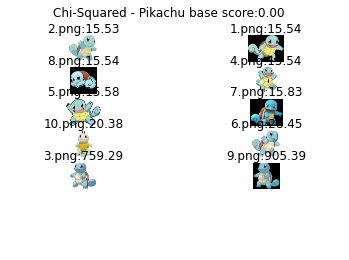

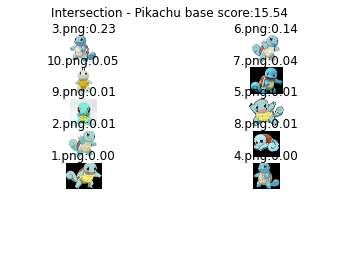

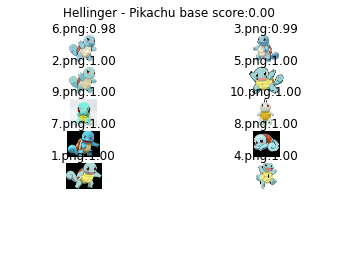

In [14]:
Compare_historgram(hist_target_dict['target_squirtle.png'],image_class_dict['squirtle'],hist_class_dict['squirtle'],'target_squirtle.png')